In [8]:
# THIS ANALYZING IS FOCUSING ON THE AGE DATA 

In [9]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as plt
%matplotlib inline
import math

In [10]:
# reading data from csv file
full_data = pd.read_csv('titanic-data.csv')

In [11]:
# focusing on the SURVIVED passengers
full_data_survived = full_data[full_data['Survived'] == 1]

## 1. Displaying the statistic values and box plot.

In [12]:
# just extract the data of column 'Age'
# remove all NaN values
age_data_survived = full_data_survived['Age'].dropna()

# create DataFrame
df_age_data_survived = pd.DataFrame( data=age_data_survived, columns=['Age'])

# view the first 5 records of the DataFrame
df_age_data_survived.head()

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0


In [13]:
# take a look the statistic values 
df_age_data_survived.describe()

,Age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


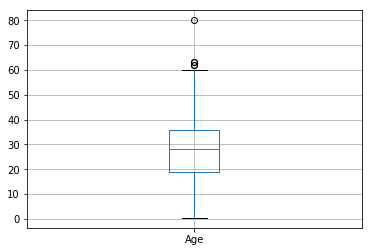

In [14]:
# display the boxplot
df_age_data_survived.boxplot()

In [15]:
# From the box & whisker plot, we can see that the most of values fall between the 1st and the 3rd Quartile, 
# that means between the ages of 19 and 36. 

In [16]:
# I guess that passengers whose ages fall in that interval would have more chance to survive than the other.

# I'm going to split data into 2 groups:
#    - group A: ages in [19, 36] (means: 19 <= age <= 36)
#    - group B: ages NOT in [19, 36] (means: age < 19 AND age > 36)

# My hypothesis here is: the survival rate of group A is higher than the group B. So i have:
# Ho: p(A) <= p(B)
# Ha: p(A) > p(B)

# with:
#  - p(A) is the survival rate of group A.
#  - p(B) is the survival rate of group B.

# So now I'm going to perform the Z-test with two proportion in order to prove my hypothesis correct.

## 2. Did the passengers whose ages in [19, 36] have more chance to survive than the others?

In [17]:
# Here are steps I will do now:
    
# 1. Split raw data into 2 data groups A and B. (just take data of columns Age and Survived, remove all NaN values)

# 2. For data group A: calculating the Number of all passenger (call n1) and the Number of survived passengers (call x1)
#    For data group B: calculating the Number of all passenger (call n2) and the Number of survived passengers (call x2)
#    Calculating the survival proportion of each group:
    
#     p(A) = x1 / n1
#     p(B) = x2 / n2
#   and p_bar = (x1+x2)/(n1+n2)

# 3. Perform Hypothesis testing.

In [18]:
######################## START 1 ##########################

In [19]:
# just extract data of columns Age and Survived
# remove all NaN values
age_n_survived_full_data = full_data[['Age','Survived']].dropna()

In [20]:
# function will split data into 2 groups A and B
# if 19 <= age <= 36 --> group A
# else group B

def grouping_age(value):
    try:
        if value >= 19 and value <= 36:
            return 'A'
        else:
            return 'B'
    except:
        raise ValueError

In [21]:
# create new column 'GROUP' then apply function grouping_age for the column Age
age_n_survived_full_data['GROUP'] = age_n_survived_full_data['Age'].apply(grouping_age)

In [22]:
age_n_survived_full_data.head()

,Age,Survived,GROUP
0,22.0,0,A
1,38.0,1,B
2,26.0,1,A
3,35.0,1,A
4,35.0,0,A


In [23]:
print(len(age_n_survived_full_data))

714


In [24]:
# new DataFrames for the data of group A and B
# just take the column Survived which is survival status
df_group_A = age_n_survived_full_data[ age_n_survived_full_data['GROUP'] == 'A' ]
df_group_B = age_n_survived_full_data[ age_n_survived_full_data['GROUP'] == 'B' ]

In [25]:
######################## END 1 ##########################

In [26]:
######################## START 2 ########################

In [27]:
# the Number of all passenger of group A: n1
n1 = len(df_group_A)

# the Number of survived passengers of group A: x1
x1 = len(df_group_A[ df_group_A['Survived'] == 1 ])

print(n1, x1)

380 148


In [28]:
# the Number of all passenger of group B: n2
n2 = len(df_group_B)

# the Number of survived passengers of group B: x2
x2 = len(df_group_B[ df_group_B['Survived'] == 1 ])

print(n2, x2)

334 142


In [29]:
# calculating p(A), p(B), p_bar
p_hat_A = x1/n1
p_hat_B = x2/n2
p_bar = (x1+x2)/(n1+n2)

print(p_hat_A, p_hat_B, p_bar)

0.3894736842105263 0.4251497005988024 0.4061624649859944


In [30]:
######################## END 2 ##########################

In [31]:
######################## START 3 ########################

In [32]:
# Before perform the hypothesis testing, I assume that:
#    - the sample data had been chosen randomly.
#    - all passengers had equaly chance to survive so they are independent samples.

# As we see the size of samples are n1 = 380 and n2 = 334, they are greater than 30 and are large samples 
# so the population distribution would approximately normal.
# With the assumption and large samples, i will perform the Z-test with two proportion now.    

In [33]:
# calculating the z_statistic value
z_statictic = round((p_hat_A - p_hat_B)/math.sqrt(p_bar*(1-p_bar)*(1/n1 + 1/n2)), 2)
print(z_statictic)

-0.97


In [34]:
# with Z-statistic value is -0.97, refer to the Z-table i have p-value
p_value = 0.166

In [35]:
###################### CONCLUSION ######################

In [36]:
# At alpha level = 0.95, since p_value = 0.166 < 0.95 so we FAIL TO REJECT THE NULL.
# That means the passengers whose ages in [19, 36] do NOT have the survival rate higher than the rest.
# The box & whisker plot shows that most of survived people have ages in [19, 36] but actually there were 380 passengers like
# them among total 714 passengers on Titanic, the survival rate of theirs was high is easy to understand. 
# It does NOT guarantee that people whose ages in [19, 36] would have more chance to survive in other disaters like Titanic.

In [37]:
######################## END 3 ########################